In [ ]:
# test df 
dfhf_dm = -461.436899197981
hf_dm = -461.4377529972

hf_mm = -230.722178456155
dfhf_mm = -230.721753826905

de_hf = hf_dm - hf_mm * 2
de_dfhf = dfhf_dm - dfhf_mm * 2
print(de_hf,de_dfhf)
print(de_hf-de_dfhf)

0.006603915110019898 0.0066084558289958295
-4.540718975931668e-06


In [9]:
import numpy as np

# monomer
# converged SCF energy = -230.721753826905
# AFQMC/UCCSD_PT2 energy (direct obs): -231.582236 +/- 0.000253

hf = -230.721753826905
dm_ref_ccsd = -0.82229903
dm_ref_afqmc = -231.582236 - hf
dm_ref_afqmc_err = 0.000253
print(f'Ref AFQMC/CCSD_PT2 Correlation Energy: {dm_ref_afqmc:.6f} +/- {dm_ref_afqmc_err:.6f}')

data = '''
#   thresh      MP2            CCSD             AFQMC/CCSD_PT2             mp2_cr        time
    1e-5    -0.77245603     -0.81630015     -0.851300 +/- 0.000306      -0.00993216     1334.72
    3e-6    -0.78017218     -0.82124329     -0.858441 +/- 0.000343      -0.00221601     1953.44
    1e-6    -0.78177571     -0.82219190     -0.860522 +/- 0.000328      -0.00061248     2408.15
    3e-7    -0.78229515     -0.82235961     -0.860874 +/- 0.000403      -0.00009304     3436.65
#   ref     -0.78238819     -0.82229903     -0.860482 +/- 0.000253            -         2082.68
'''

thresh = []
dm_mp2 = []
dm_ccsd = []
dm_afqmc = []
dm_afqmc_err = []
dm_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        dm_mp2 = np.hstack((dm_mp2,[float(parts[1])]))
        dm_ccsd = np.hstack((dm_ccsd,[float(parts[2])]))
        dm_afqmc = np.hstack((dm_afqmc,[float(parts[3])]))
        dm_afqmc_err = np.hstack((dm_afqmc_err,[float(parts[5])]))
        dm_mp2cr = np.hstack((dm_mp2cr,[float(parts[6])]))

dm_ref_ccsd = np.array([dm_ref_ccsd]*len(dm_ccsd))
dm_ref_afqmc = np.array([dm_ref_afqmc]*len(dm_afqmc))
dm_ref_afqmc_err = dm_ref_afqmc_err * 2
dm_afqmc_err = dm_afqmc_err * 2

Ref AFQMC/CCSD_PT2 Correlation Energy: -0.860482 +/- 0.000253


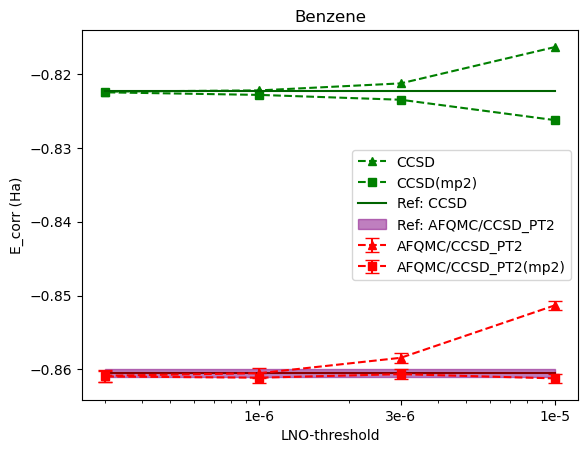

In [10]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(10, 6))
plt.plot(thresh,dm_ccsd,'^--',color='green',label='CCSD')
plt.plot(thresh,dm_ccsd+dm_mp2cr,'s--',color='green',label='CCSD(mp2)')
plt.errorbar(thresh,dm_afqmc,dm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,dm_afqmc+dm_mp2cr,dm_afqmc_err,fmt='s--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
plt.plot(thresh,dm_ref_ccsd,'-',color='darkgreen',label='Ref: CCSD')
plt.plot(thresh,dm_ref_afqmc,'-', color='darkred')
plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
                 dm_ref_afqmc[0]-dm_ref_afqmc_err,dm_ref_afqmc[0]+dm_ref_afqmc_err,
                 color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
ticks = [1e-5, 3e-6, 1e-6]
labels = ['1e-5', '3e-6', '1e-6']
plt.xticks(ticks, labels)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Benzene')
plt.legend()
plt.show()

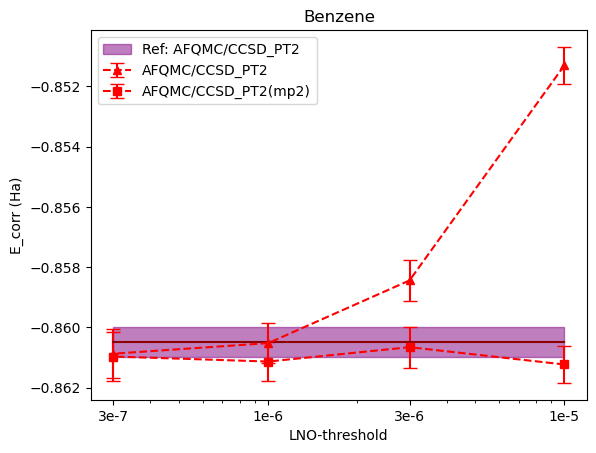

In [13]:
plt.errorbar(thresh,dm_afqmc,dm_afqmc_err,fmt='^--',capsize=5, color='red', label='AFQMC/CCSD_PT2')
plt.errorbar(thresh,dm_afqmc+dm_mp2cr,dm_afqmc_err,fmt='s--',capsize=5, color='red', label='AFQMC/CCSD_PT2(mp2)')
plt.plot(thresh,dm_ref_afqmc,'-', color='darkred')
plt.fill_between(np.linspace(thresh[0],thresh[-1],50),
                 dm_ref_afqmc[0]-dm_ref_afqmc_err,dm_ref_afqmc[0]+dm_ref_afqmc_err,
                 color='purple', alpha = 0.5, label='Ref: AFQMC/CCSD_PT2')
plt.xscale('log')
ticks = [1e-5, 3e-6, 1e-6, 3e-7]
labels = ['1e-5', '3e-6', '1e-6', '3e-7']
plt.xticks(ticks, labels)
plt.xlabel('LNO-threshold')
plt.ylabel('E_corr (Ha)')
plt.title('Benzene')
plt.legend()
plt.show()

In [ ]:
# dimer no reference
hf = -461.43689919798
print(f'Ref AFQMC/CCSD_PT2 Correlation Energy: {dm_ref_afqmc:.6f} +/- {dm_ref_afqmc_err:.6f}')

data = '''
#   thresh      MP2            CCSD             AFQMC/CCSD_PT2             mp2_cr        time
    1e-5    -1.55118159     -1.63716411     -1.707833 +/- 0.000453      -0.02689046     4460.00
#   ref     -1.57807205          -                      -            -
'''

thresh = []
dm_mp2 = []
dm_ccsd = []
dm_afqmc = []
dm_afqmc_err = []
dm_mp2cr = []
for line in data.splitlines():
    if not line.startswith('#') and len(line)>0:
        parts = line.split()
        thresh = np.hstack((thresh,[float(parts[0])]))
        dm_mp2 = np.hstack((dm_mp2,[float(parts[1])]))
        dm_ccsd = np.hstack((dm_ccsd,[float(parts[2])]))
        dm_afqmc = np.hstack((dm_afqmc,[float(parts[3])]))
        dm_afqmc_err = np.hstack((dm_afqmc_err,[float(parts[5])]))
        dm_mp2cr = np.hstack((dm_mp2cr,[float(parts[6])]))
